In [30]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import subprocess
import os

In [31]:
# Download data to /data folder

# Ensure data directory exists
os.makedirs('data', exist_ok=True)

# URL of the file
url = "https://techassessment.blob.core.windows.net/aiap20-assessment-data/bmarket.db"

# Path to save the file
output_path = "data/bmarket.db"

# Use wget via subprocess
subprocess.run(["wget", url, "-O", output_path], check=True)

print("Download complete:", output_path)

Download complete: data/bmarket.db


In [32]:
# Connect to database
conn = sqlite3.connect("/content/data/bmarket.db")

# Fetch all rows from the 'bank_marketing' table
cursor = conn.cursor()

# cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
cursor.execute("SELECT * FROM bank_marketing")
rows = cursor.fetchall()

# Create DataFrame from the results
columns = [description[0] for description in cursor.description]  # Get column names
df = pd.DataFrame(rows, columns=columns)

# Print the DataFrame
print(df)

# Close the connection
conn.close()

       Client ID       Age   Occupation Marital Status      Education Level  \
0          32885  57 years   technician        married          high.school   
1           3170  55 years      unknown        married              unknown   
2          32207  33 years  blue-collar        married             basic.9y   
3           9404  36 years       admin.        married          high.school   
4          14021  27 years    housemaid        married          high.school   
...          ...       ...          ...            ...                  ...   
41183       6266  58 years      retired        married  professional.course   
41184      11285  37 years   management        married    university.degree   
41185      38159  35 years       admin.        married          high.school   
41186        861  40 years   management        married    university.degree   
41187      15796  29 years       admin.         single    university.degree   

      Credit Default Housing Loan Personal Loan Con

In [33]:
# Check for missing values
df.isnull().sum()

,0
Client ID,0
Age,0
Occupation,0
Marital Status,0
Education Level,0
Credit Default,0
Housing Loan,24789
Personal Loan,4146
Contact Method,0
Campaign Calls,0


In [34]:
# Check number of rows and columns
df.shape

(41188, 12)

In [35]:
# View statistics
df.describe(include="all")

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
count,41188.00000,41188,41188,41188,41188,41188,16399,37042,41188,41188.000000,41188.000000,41188
unique,NaN,77,12,4,8,3,3,3,4,NaN,NaN,2
top,NaN,150 years,admin.,married,university.degree,no,yes,no,Cell,NaN,NaN,no
freq,NaN,4197,10422,24928,12168,32588,8595,30532,13100,NaN,NaN,36548
mean,20594.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.051374,962.475454,NaN
std,11890.09578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.171345,186.910907,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.000000,0.000000,NaN
25%,10297.75000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,NaN
50%,20594.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,NaN
75%,30891.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,NaN


In [36]:
# View data types
df.dtypes

# Will have to extract numerical age from string and convert to int as dtype of age is object

,0
Client ID,int64
Age,object
Occupation,object
Marital Status,object
Education Level,object
Credit Default,object
Housing Loan,object
Personal Loan,object
Contact Method,object
Campaign Calls,int64


In [37]:
# View first 10 rows
df.head(10)

# Able to visually see that some data cleaning is required in features 'Contact Method'
# i.e. merge 'Cell' with 'cellular' (assumed to be mobile) and 'Telephone' with 'telephone' (assumed to be landline)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57 years,technician,married,high.school,no,no,yes,Cell,1,999,no
1,3170,55 years,unknown,married,unknown,unknown,yes,no,telephone,2,999,no
2,32207,33 years,blue-collar,married,basic.9y,no,no,no,cellular,1,999,no
3,9404,36 years,admin.,married,high.school,no,no,no,Telephone,4,999,no
4,14021,27 years,housemaid,married,high.school,no,None,no,Cell,2,999,no
5,17202,58 years,retired,married,professional.course,no,None,yes,Cell,1,999,no
6,880,48 years,services,married,high.school,unknown,yes,no,Telephone,1,999,no
7,23758,150 years,admin.,divorced,university.degree,unknown,yes,None,Cell,7,999,no
8,10822,24 years,entrepreneur,married,university.degree,no,None,None,telephone,4,999,no
9,14356,36 years,technician,divorced,professional.course,no,yes,yes,Cell,4,999,no


In [38]:
# List unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' ({len(unique_values)} unique values):")
    print(unique_values)
    print()

# housing loan has 4 unique values but none (or null) carries the same meaning as unknown
# personal loan has 4 unique values but none (or null) carries the same meaning as unknown

Unique values in 'Client ID' (41188 unique values):
[32885  3170 32207 ... 38159   861 15796]

Unique values in 'Age' (77 unique values):
['57 years' '55 years' '33 years' '36 years' '27 years' '58 years'
 '48 years' '150 years' '24 years' '34 years' '42 years' '43 years'
 '26 years' '37 years' '46 years' '59 years' '49 years' '30 years'
 '51 years' '45 years' '31 years' '41 years' '38 years' '47 years'
 '69 years' '50 years' '25 years' '39 years' '44 years' '52 years'
 '35 years' '77 years' '40 years' '56 years' '53 years' '60 years'
 '29 years' '28 years' '54 years' '32 years' '81 years' '63 years'
 '21 years' '22 years' '74 years' '80 years' '62 years' '68 years'
 '86 years' '23 years' '71 years' '67 years' '65 years' '20 years'
 '19 years' '66 years' '75 years' '18 years' '72 years' '70 years'
 '82 years' '85 years' '61 years' '88 years' '83 years' '78 years'
 '64 years' '17 years' '76 years' '73 years' '79 years' '89 years'
 '84 years' '91 years' '98 years' '92 years' '95 years']


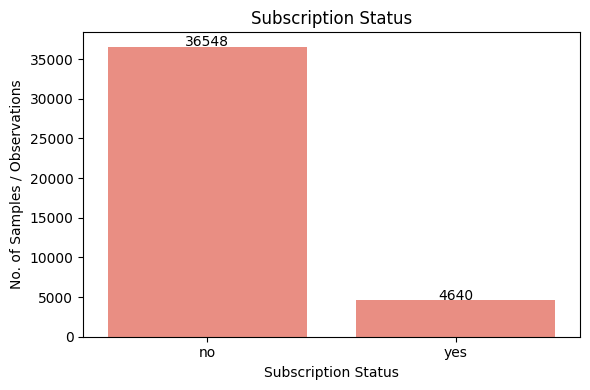

In [39]:
# Distribution of subsription status
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Subscription Status'], color='salmon')  # assign the plot to ax

plt.title('Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('No. of Samples / Observations')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 50, f'{int(height)}', ha='center')

plt.tight_layout()
plt.show()

# Data is significantly imbalanced with more representation of clients who are non-subscribers
# Use parameter stratify=y in train_test_split to ensure that the splitting process
# maintains the same proportion of classes in the target variable y in both the training and testing sets

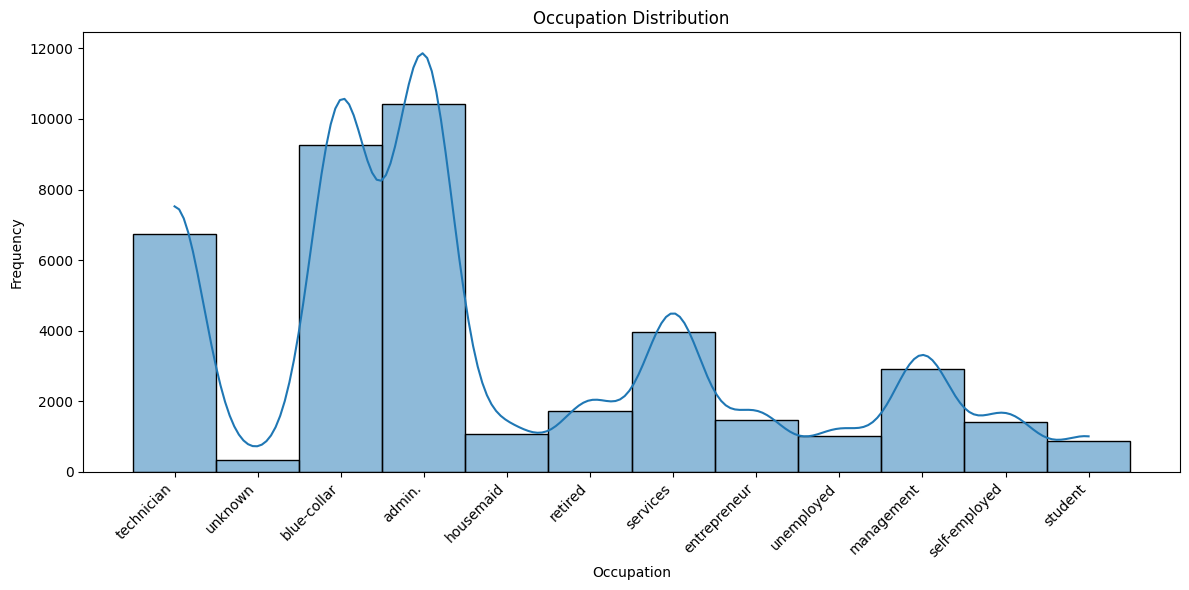

In [40]:
# Distribution of occupation

plt.figure(figsize=(12, 6))
sns.histplot(df['Occupation'], bins=20, kde=True)

plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')

# Rotate x-axis labels to prevent cutoff
plt.xticks(rotation=45, ha='right')

# Prevent clipping of labels
plt.tight_layout()

plt.show()

# Technicians, blue-collar workers and admin workers are more heavily represented in the data set
# Use one-hot encoding to convert categories to binary variables to prevent model from assuming importance of one category over another

In [41]:
# Feature Processing

# Extract numerical age from string using regex and convert to int for feature 'Age'
df['Age'] = df['Age'].str.extract(r'(\d+)').astype(int)

# Replace 'Telephone' with 'telephone' and 'Cell' with 'cellular'
def contact_method_cleaning(mobile_str):

    if mobile_str == 'Telephone':
        return 'telephone'
    elif mobile_str == 'Cell':
        return 'cellular'
    else:
        return mobile_str

# Apply contact_method_cleaning function to feature 'Contact Method'
df['Contact Method'] = df['Contact Method'].apply(contact_method_cleaning)

# Map 'no' to 0, 'yes' to 1 and 'unknown' or NULL to -1
def yes_no_binary(yes_no_str):

    if yes_no_str == 'no':
        return 0
    elif yes_no_str == 'yes':
        return 1
    else:
        return -1

# Apply yes_no_binary function to features 'Hosing Loan', 'Personal Loan', 'Credit Default' and 'Subscription Status'
df['Housing Loan'] = df['Housing Loan'].apply(yes_no_binary)
df['Personal Loan'] = df['Personal Loan'].apply(yes_no_binary)
df['Credit Default'] = df['Credit Default'].apply(yes_no_binary)
df['Subscription Status'] = df['Subscription Status'].apply(yes_no_binary)

# Mapping for feature 'Education_Level'
def education_mapping(str):
    if str == 'illiterate':
        return 1
    elif str == 'basic.4y':
        return 2
    elif str == 'basic.6y':
        return 3
    elif str == 'basic.9y':
        return 4
    elif str == 'high.school':
        return 5
    elif str == 'professional.course':
        return 6
    elif str == 'university.degree':
        return 7
    elif str == 'unknown':
        return -1

# Apply education_mapping function to feature 'Education Level'
df['Education Level'] = df['Education Level'].apply(education_mapping)

# Map 999 in feature 'Previous Contact Days' to -1 (999 means no prior contact)
def previous_contact_days_mapping(int):
    if int == 999:
        return -1
    else:
        return str
# Apply previous_Contact_days_mapping function to 'Previous Contact Days'
df['Previous Contact Days'] = df['Previous Contact Days'].apply(previous_contact_days_mapping)

df.head(5)

,Client ID,Age,Occupation,Marital Status,Education Level,Credit Default,Housing Loan,Personal Loan,Contact Method,Campaign Calls,Previous Contact Days,Subscription Status
0,32885,57,technician,married,5,0,0,1,cellular,1,-1,0
1,3170,55,unknown,married,-1,-1,1,0,telephone,2,-1,0
2,32207,33,blue-collar,married,4,0,0,0,cellular,1,-1,0
3,9404,36,admin.,married,5,0,0,0,telephone,4,-1,0
4,14021,27,housemaid,married,5,0,-1,0,cellular,2,-1,0


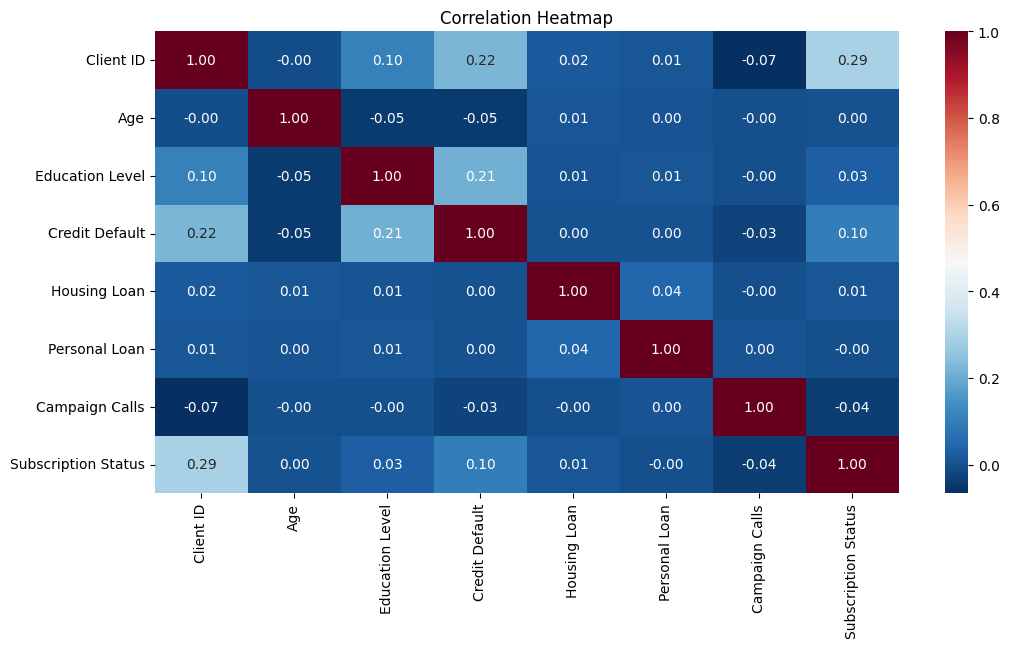

In [42]:
# Compute correlations and store in variable 'corr_df'

plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# There seems to be a correlation between 'Subscription Status' and 'Client ID'

In [43]:
# One-hot encoding to features 'Occupation', 'Marital Status' and 'Contact Method'
df = pd.get_dummies(df, columns=['Occupation'], prefix='occupation')
df = pd.get_dummies(df, columns=['Marital Status'], prefix='marital_status')
df = pd.get_dummies(df, columns=['Contact Method'], prefix='contact_method')

# Drop feature 'marital_status_single' to avoid perfect correlation (not married not divorced = single)
# Drop feature 'contact_method_telphone' to avoid perfect correlation (not telephone = cellular)

In [44]:
df.describe().T

# 'Campaign Calls' has negative values with the minimum being -41.0
# List of attributes states that 'Campaign Calls' is the total number of contacts performed during this campaign,
# for this client, including the last contact.
# Could be data entry error

,count,mean,std,min,25%,50%,75%,max
Client ID,41188.0,20594.500000,11890.095780,1.0,10297.75,20594.5,30891.25,41188.0
Age,41188.0,51.231572,34.708486,17.0,33.00,40.0,51.00,150.0
Education Level,41188.0,4.902010,2.025168,-1.0,4.00,5.0,7.00,7.0
Credit Default,41188.0,-0.208653,0.406530,-1.0,0.00,0.0,0.00,1.0
Housing Loan,41188.0,-0.402714,0.811114,-1.0,-1.00,-1.0,0.00,1.0
Personal Loan,41188.0,0.014810,0.508432,-1.0,0.00,0.0,0.00,1.0
Campaign Calls,41188.0,2.051374,3.171345,-41.0,1.00,2.0,3.00,56.0
Subscription Status,41188.0,0.112654,0.316173,0.0,0.00,0.0,0.00,1.0


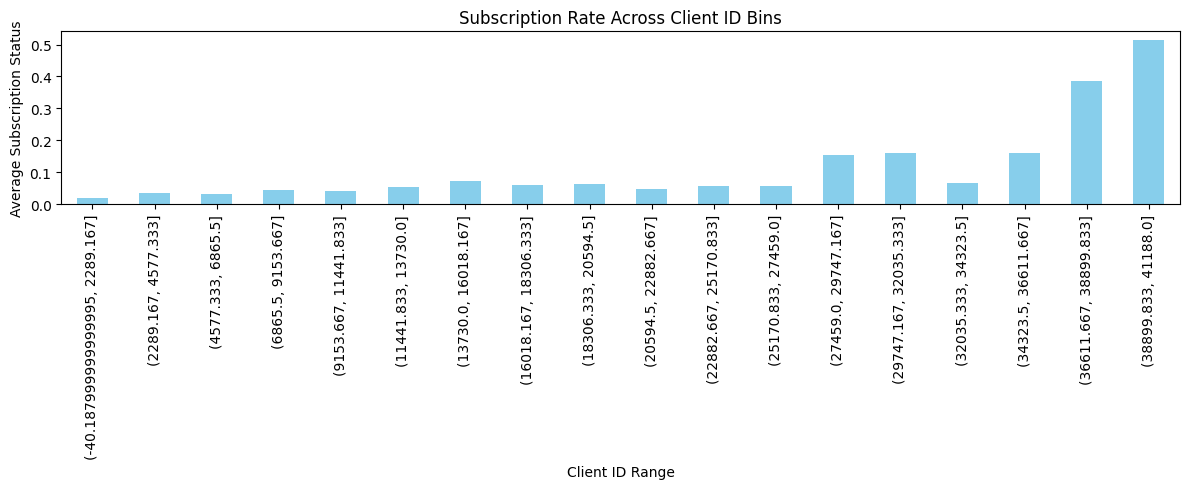

In [45]:
# Create equal-width bins for Client ID
df['ClientID_bin'] = pd.cut(df['Client ID'], bins=18, include_lowest=True)

# Group by bins and calculate mean subscription rate
bin_subscription_rate = df.groupby('ClientID_bin', observed=False)['Subscription Status'].mean()

# Plot the subscription rate across bins
plt.figure(figsize=(12, 5))
bin_subscription_rate.plot(kind='bar', color='skyblue')
plt.title('Subscription Rate Across Client ID Bins')
plt.xlabel('Client ID Range')
plt.ylabel('Average Subscription Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Examine the correlation between 'Client ID' and 'Subscription Status'
# Certain bins of 'Client ID' could be allocated to different telemarkers of which some are better salesperson than the other
# Telemarketers could be assigned to clients based on 'Client ID'.
# Some telemarketrs could be more effective at sales

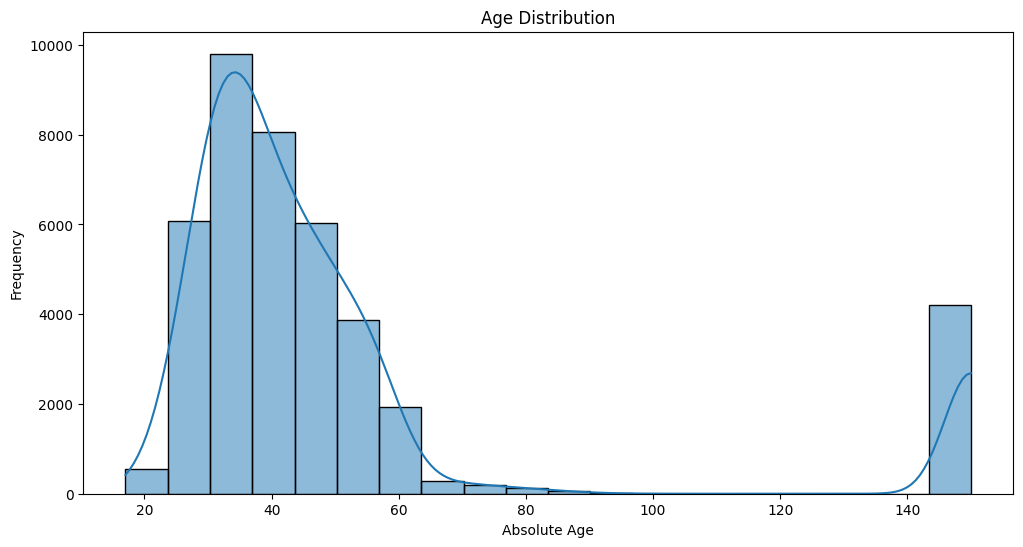

In [46]:
# View age distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Absolute Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of age is skewed
# Presence of extreme outliers such as 150 years old
# Remove outliers

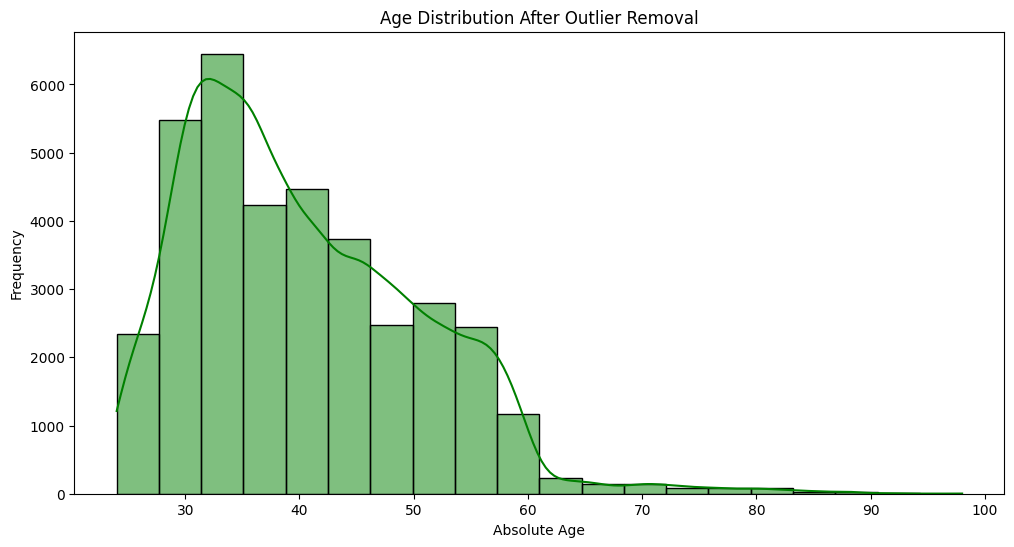

In [47]:
# Remove outliers using percentile
lower_bound = df['Age'].quantile(0.01)
upper_bound = df['Age'].quantile(0.99)

df = df[(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]

# Visualize cleaned distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Absolute Age')
plt.ylabel('Frequency')
plt.show()